# Task 1: Customer Churn Prediction for a Telecom Company

Task Overview
Objective: Build a machine learning model to predict customer churn using historical data.

Deliverables:

• Exploratory Data Analysis (EDA)\
• Feature engineering\
• Train/test split and model selection (Logistic Regression, XGBoost, etc.)\
• Performance metrics (confusion matrix, AUC-ROC)\
• Final report with visualizations


In [205]:
# Mock Data (Python): 

import pandas as pd
import numpy as np

np.random.seed(42)

n = 10000

data = pd.DataFrame({
  'CustomerID': np.arange(n),
  'Gender': np.random.choice(['Male', 'Female'], size=n),
  'SeniorCitizen': np.random.choice([0, 1], size=n),
  'Tenure': np.random.randint(1, 72, size=n),
  'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),
  'TotalCharges': lambda df: df['Tenure'] * df['MonthlyCharges'],
  'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
  'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),
  'Churn': np.random.choice([0, 1], size=n, p=[0.73, 0.27])
})

data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)

In [206]:
data.head()

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,0,Male,0,55,111.88,6153.40,Two year,Mailed check,0
1,1,Female,1,36,58.70,2113.20,Two year,Electronic check,0
2,2,Male,0,37,118.86,4397.82,One year,Electronic check,0
3,3,Male,1,14,96.14,1345.96,Month-to-month,Mailed check,1
4,4,Male,1,27,28.05,757.35,Two year,Mailed check,0


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10000 non-null  int64  
 1   Gender          10000 non-null  object 
 2   SeniorCitizen   10000 non-null  int64  
 3   Tenure          10000 non-null  int64  
 4   MonthlyCharges  10000 non-null  float64
 5   TotalCharges    10000 non-null  float64
 6   Contract        10000 non-null  object 
 7   PaymentMethod   10000 non-null  object 
 8   Churn           10000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 703.2+ KB


In [216]:
data['Churn'].value_counts()

Churn
0    7330
1    2670
Name: count, dtype: int64

In [209]:
X = data[['Gender', 'SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]
y = data['Churn']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])
X.loc[:, 'Contract'] = le.fit_transform(X['Contract'])
X.loc[:, 'PaymentMethod'] = le.fit_transform(X['PaymentMethod'])

# preprocess the data
scalar = StandardScaler()
X.loc[:, ['Tenure', 'MonthlyCharges', 'TotalCharges']] = scalar.fit_transform(X[['Tenure', 'MonthlyCharges', 'TotalCharges']])
X.loc[:, ['Contract', 'PaymentMethod']] = scalar.fit_transform(X[['Contract', 'PaymentMethod']])


In [211]:
X.sample(n=5)

,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
1780,0,1,-0.339256,-1.705627,-1.026792,-0.013227,-1.340355
4401,1,0,0.099753,-0.153487,-0.017785,-0.013227,1.344651
5129,0,0,-0.436814,0.388431,-0.178860,-0.013227,0.449649
3968,0,1,-0.534371,-0.649094,-0.665083,-1.249411,0.449649
9678,0,1,-1.119716,-0.761763,-1.017518,-1.249411,0.449649


In [212]:
from sklearn.model_selection import train_test_split

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [213]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

Probabilities of being True Negative and True Positive: 
[[0.875 0.125]
 [0.875 0.125]
 [0.75  0.25 ]
 [0.625 0.375]
 [0.75  0.25 ]]
Probabilities of being True Positive:  [0.125 0.125 0.25  0.375 0.25 ]


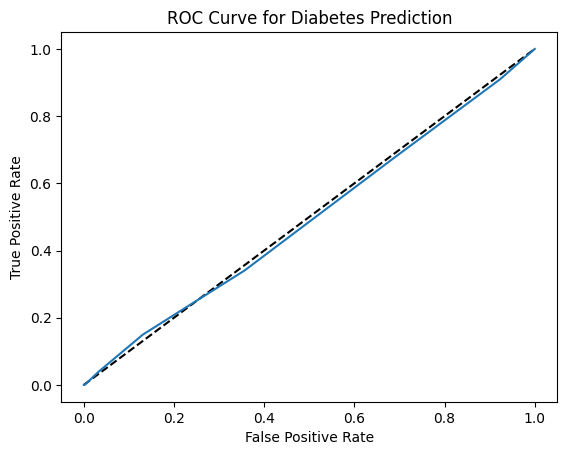

0.4934373898247927


In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = model.predict_proba(X_test)
print("Probabilities of being True Negative and True Positive: ")
print(y_probs[:5])

y_pred_probs = y_probs[:, 1] # Picked 2nd column which contains Predicted-Yes(True Positive) values. and 1st column contains Predicted-No(True Negative) values
print("Probabilities of being True Positive: ", y_pred_probs[:5])

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

################################ 
print(roc_auc_score(y_test, y_pred_probs)) # Calculate roc_auc_score

[[1418   48]
 [ 513   21]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      1466
           1       0.30      0.04      0.07       534

    accuracy                           0.72      2000
   macro avg       0.52      0.50      0.45      2000
weighted avg       0.62      0.72      0.63      2000



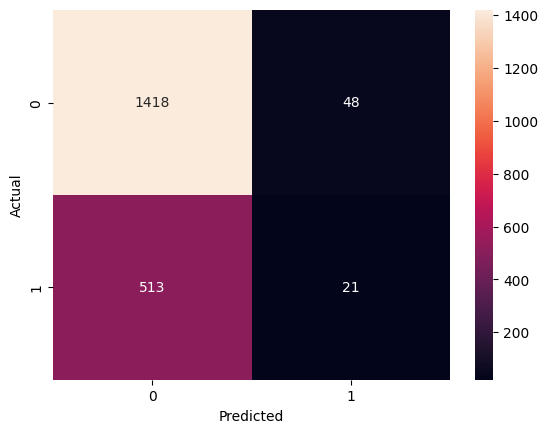

In [215]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## REPORT:

The model is evaluated on a dataset of 2000 samples. The results are as follows:

- Our model is predicting 72% accurately.
- The model performs well on `Class 0`, achieving high recall (0.97), meaning it correctly identifies most of the `Class 0` samples.
- For `Class 1`, performance is very poor, with recall only 0.04. This shows the model is failing to detect `Class 1` cases.

The model is biased toward `Class 0` and struggles with detecting `Class 1`